In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,RepeatedKFold
from datetime import date
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge,LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




In [2]:
df_price=pd.read_csv("C:\\Users\\KIIT\\Downloads\\price_data.csv")
df_client=pd.read_csv("C:\\Users\\KIIT\\Downloads\\client_data.csv")




In [3]:
df_price


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [4]:
df_client.head()


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
df_merge=pd.merge(df_client,df_price,how='inner',on='id')


In [6]:
df_merge


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


In [9]:
df_merge.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

In [10]:
df_merge.duplicated().sum()

0

In [11]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='churn', ylabel='Density'>

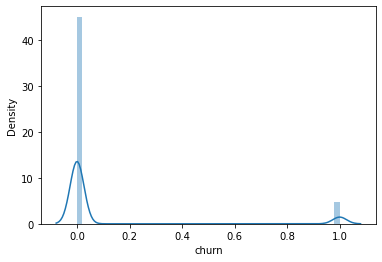

In [7]:
sns.distplot(a=df_merge['churn'])



C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_peak_var', ylabel='Density'>

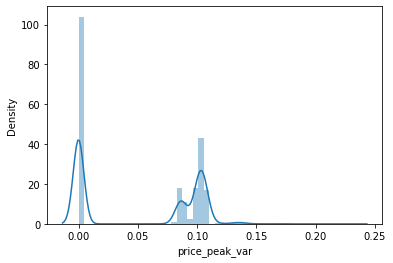

In [8]:
sns.distplot(a=df_merge['price_peak_var'])

In [9]:
df_merge['price_date']



0         2015-01-01
1         2015-02-01
2         2015-03-01
3         2015-04-01
4         2015-05-01
             ...    
175144    2015-08-01
175145    2015-09-01
175146    2015-10-01
175147    2015-11-01
175148    2015-12-01
Name: price_date, Length: 175149, dtype: object

In [10]:
df_merge['price_date']=pd.to_datetime(df_merge['price_date'],format='%Y-%m-%d')





<AxesSubplot:xlabel='price_date', ylabel='cons_gas_12m'>

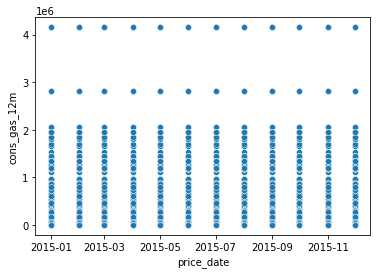

In [11]:
sns.scatterplot(x=df_merge['price_date'],y=df_merge['cons_gas_12m'])



<AxesSubplot:xlabel='price_date', ylabel='pow_max'>

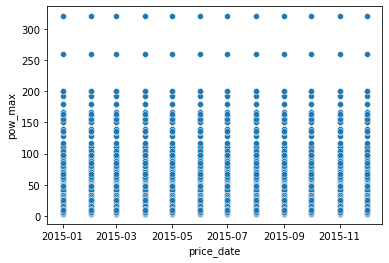

In [17]:
sns.scatterplot(x=df_merge['price_date'],y=df_merge['pow_max'])



<AxesSubplot:xlabel='price_date', ylabel='imp_cons'>

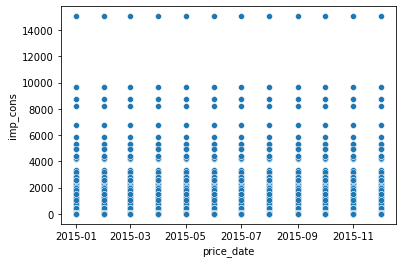

In [35]:
sns.scatterplot(x=df_merge['price_date'],y=df_merge['imp_cons'])


<AxesSubplot:xlabel='price_date', ylabel='margin_gross_pow_ele'>

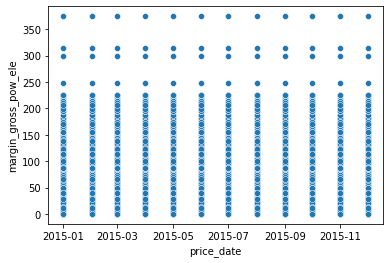

In [36]:
sns.scatterplot(x=df_merge['price_d'],y=df_merge['margin_gross_pow_ele'])



# price date month and  day

In [12]:
df_merge['month']=df_merge['price_date'].dt.month_name()
df_merge['day']=df_merge['price_date'].dt.day_name()


In [13]:
df_merge.drop(columns={'channel_sales'},axis=1,inplace=True)


<AxesSubplot:xlabel='month'>

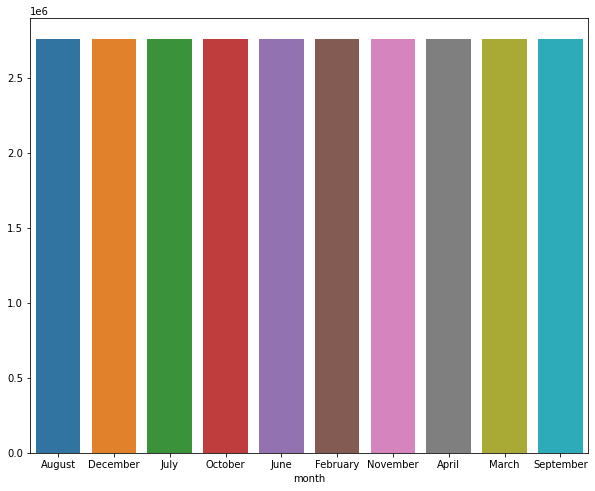

In [74]:
plt.figure(figsize=(10,8))
date_margin=df_merge[['net_margin','month']].groupby('month')['net_margin'].sum().sort_values(ascending=False).head(n=10)
sns.barplot(x=date_margin.index,y=date_margin.values)





        






# margin on the basis of days

<AxesSubplot:xlabel='day'>

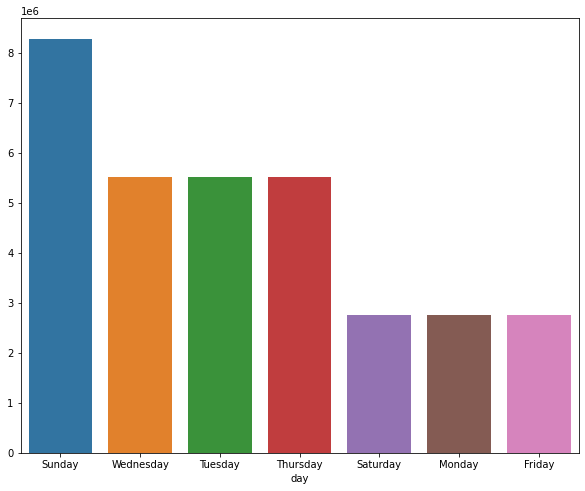

In [102]:
plt.figure(figsize=(10,8))
date_margin=df_merge[['net_margin','day']].groupby('day')['net_margin'].sum().sort_values(ascending=False).head(n=10)
sns.barplot(x=date_margin.index,y=date_margin.values)



# number of active products on the basis of month

<AxesSubplot:xlabel='month'>

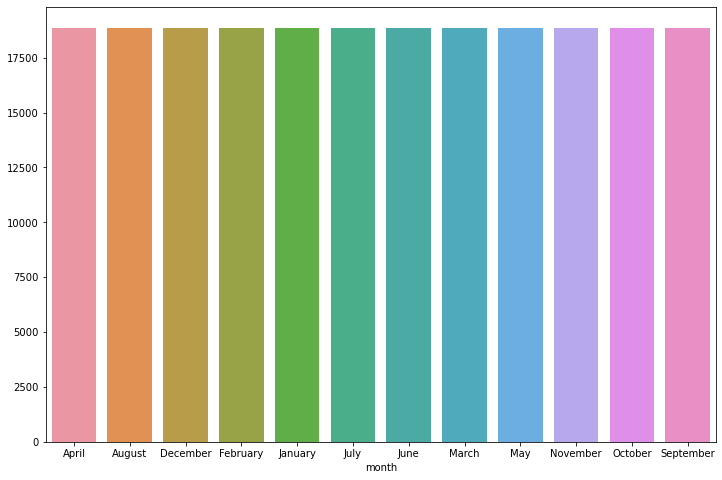

In [100]:
plt.figure(figsize=(12,8))
prod_month=df_merge[['nb_prod_act','month']].groupby('month')['nb_prod_act'].sum().head(n=12)
sns.barplot(x=prod_month.index,y=prod_month.values)



<AxesSubplot:xlabel='day'>

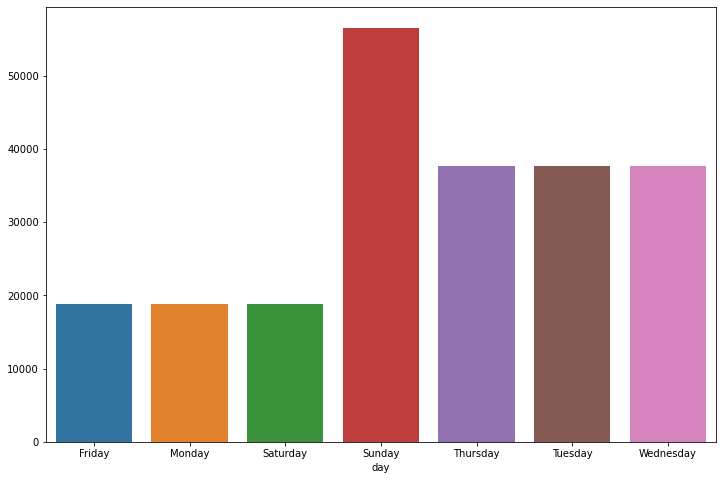

In [101]:
plt.figure(figsize=(12,8))
prod_day=df_merge[['nb_prod_act','day']].groupby('day')['nb_prod_act'].sum().head(n=7)
sns.barplot(x=prod_day.index,y=prod_day.values)


In [ ]:
df_merge['days_count']

In [14]:
df_merge[['date_activ','date_end','net_margin','nb_prod_act']]


,date_activ,date_end,net_margin,nb_prod_act
0,2013-06-15,2016-06-15,678.99,2
1,2013-06-15,2016-06-15,678.99,2
2,2013-06-15,2016-06-15,678.99,2
3,2013-06-15,2016-06-15,678.99,2
4,2013-06-15,2016-06-15,678.99,2
...,...,...,...,...
175144,2009-12-18,2016-12-17,96.34,1
175145,2009-12-18,2016-12-17,96.34,1
175146,2009-12-18,2016-12-17,96.34,1
175147,2009-12-18,2016-12-17,96.34,1


In [ ]:
margin_gross_pow_ele            
 19  margin_net_pow_ele              
 20  nb_prod_act                  
 21  net_margin   

# Days count 

In [15]:
df_merge['date_activ']=pd.to_datetime(df_merge['date_activ'],format='%Y-%m-%d')
df_merge['date_end']=pd.to_datetime(df_merge['date_end'],format='%Y-%m-%d')



In [16]:
df_merge['days_count']=(df_merge['date_end']-df_merge['date_activ'])/np.timedelta64(1,'D')



In [17]:
df_merge['days_count'].value_counts()


1461.0    29392
2557.0    28803
2192.0    26432
1827.0    24808
1096.0     7732
          ...  
1062.0       11
2217.0       11
979.0        11
1267.0       10
1683.0        7
Name: days_count, Length: 1410, dtype: int64

# finding  number days  in which product becomes active 

<AxesSubplot:xlabel='days_count'>

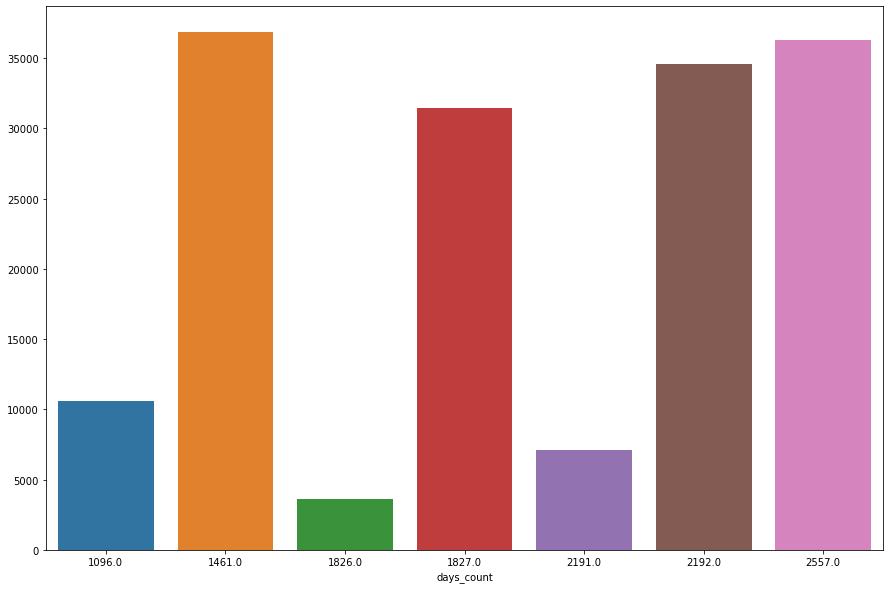

In [122]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['nb_prod_act','days_count']].groupby('days_count')['nb_prod_act'].sum().sort_values(ascending=False).head(n=7)
sns.barplot(x=prod_day.index,y=prod_day.values)



# net_margin vs days_count

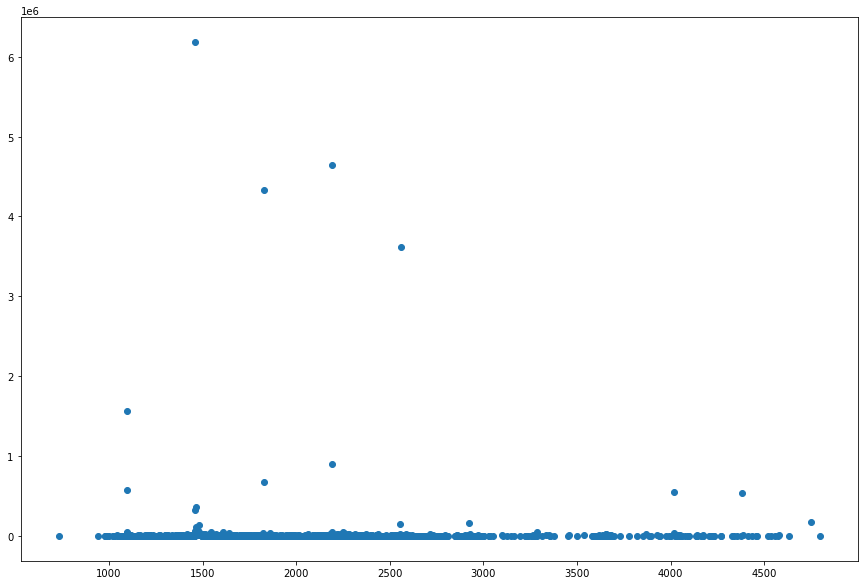

In [18]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['net_margin','days_count']].groupby('days_count')['net_margin'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)



# margin_net_pow_ele vs days count

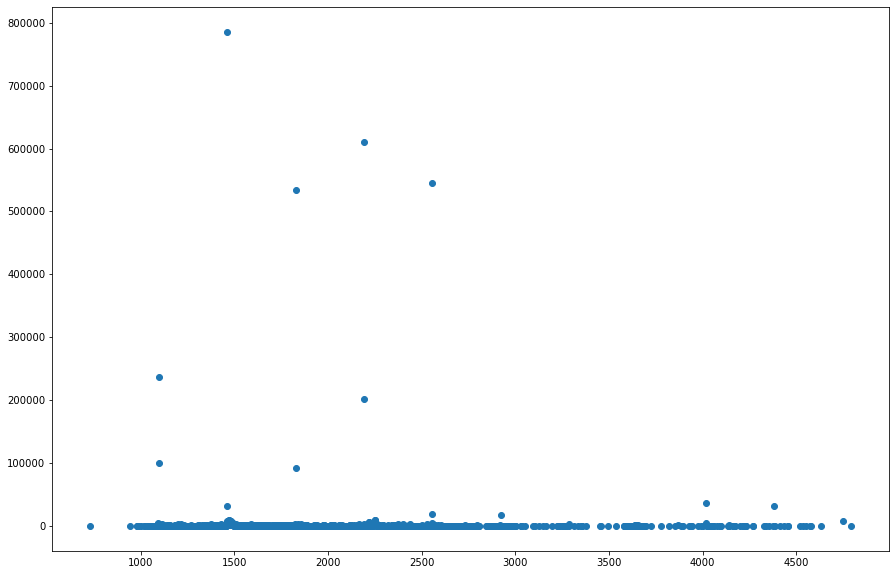

In [127]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['margin_net_pow_ele','days_count']].groupby('days_count')['margin_net_pow_ele'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)



# margin_gross_pow_ele


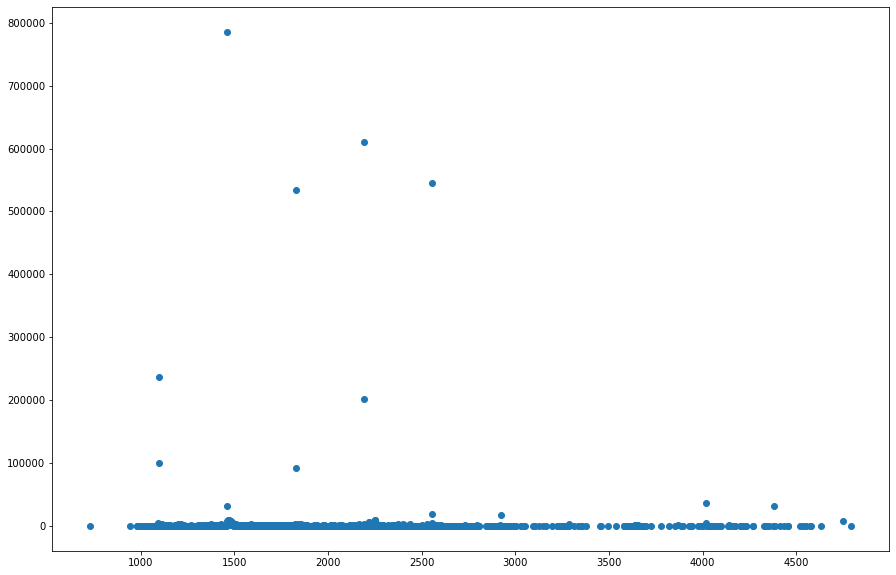

In [131]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['margin_gross_pow_ele','days_count']].groupby('days_count')['margin_gross_pow_ele'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)



In [ ]:
 price_off_peak_var              
 28  price_peak_var                 
 29  price_mid_peak_var              
 30  price_off_peak_fix              
 31  price_peak_fix                  
 32  price_mid_peak_fix 
●date_modif_prod = date of the last modification of the product
●date_renewal = date of the next contract renewal
###
●forecast_cons_12m = forecasted electricity consumption for next 12 months
●forecast_cons_year = forecasted electricity consumption for the next calendar year
●forecast_discount_energy = forecasted value of current discount
●forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
forecast_price_pow_off_peak = forecasted power price for 1st period (o

# after renewal

In [19]:
df_merge['date_modif_prod']=pd.to_datetime(df_merge['date_modif_prod'],format='%Y-%m-%d')
df_merge['date_renewal']=pd.to_datetime(df_merge['date_renewal'],format='%Y-%m-%d')




# days count after renewal  and price date

In [20]:
df_merge['days_renew']=(df_merge['date_renewal']-df_merge['price_date'])/np.timedelta64(1,'D')


# net margin  after days renewal 

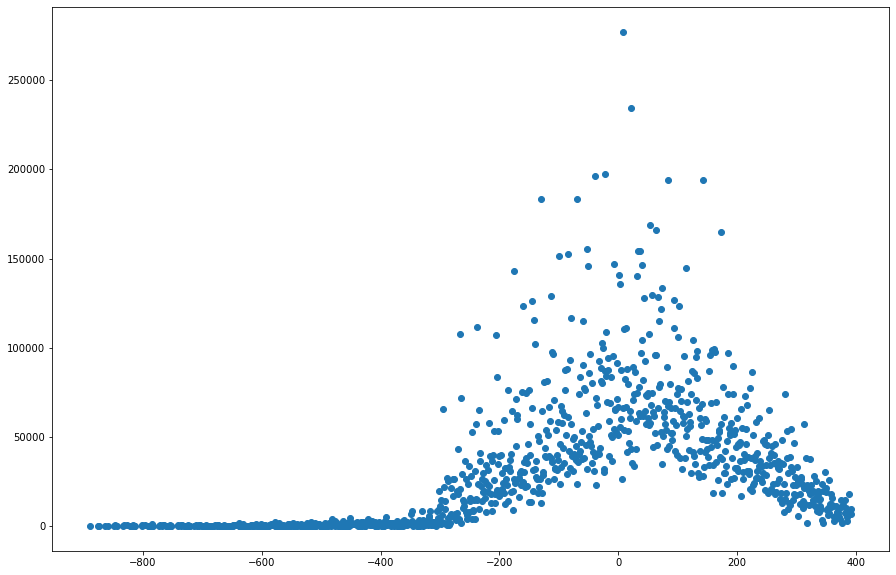

In [35]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['net_margin','days_renew']].groupby('days_renew')['net_margin'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)



#   finding  net  marign in power electricity after renewal

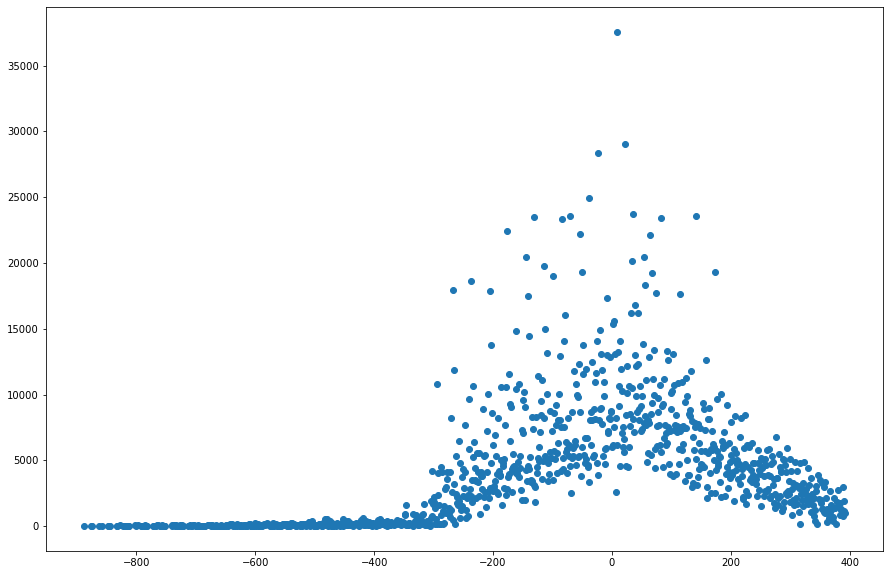

In [36]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['margin_net_pow_ele','days_renew']].groupby('days_renew')['margin_net_pow_ele'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)


#  finding gross margin in  power electricity after days renewal

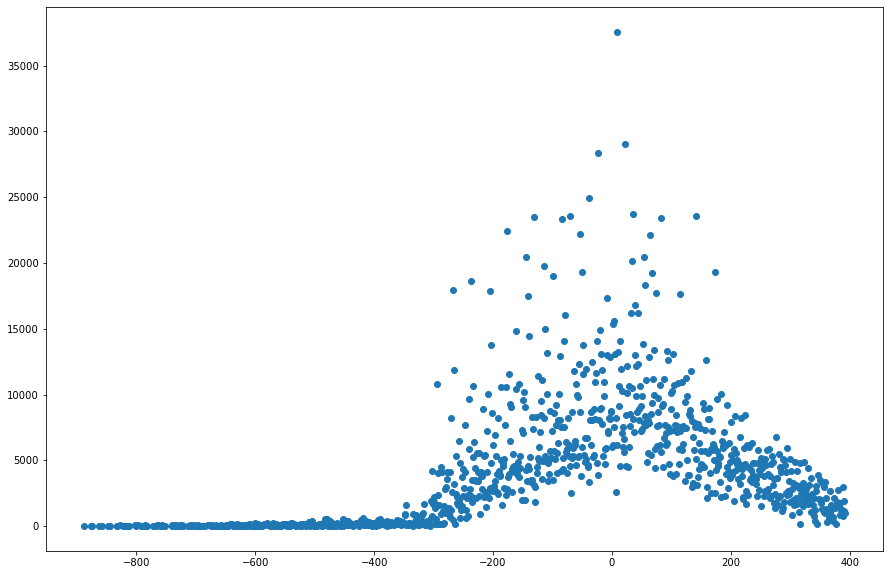

In [38]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['margin_gross_pow_ele','days_renew']].groupby('days_renew')['margin_gross_pow_ele'].sum()
plt.scatter(x=prod_day.index,y=prod_day.values)



In [24]:
df_merge[['price_off_peak_var','price_peak_var','churn']]


,price_off_peak_var,price_peak_var,churn
0,0.125976,0.103395,1
1,0.125976,0.103395,1
2,0.125976,0.103395,1
3,0.125976,0.103395,1
4,0.125976,0.103395,1
...,...,...,...
175144,0.165962,0.086905,0
175145,0.165962,0.086905,0
175146,0.165962,0.086905,0
175147,0.165962,0.086905,0


In [25]:
df_merge['churn'].value_counts()

0    158146
1     17003
Name: churn, dtype: int64

In [45]:
df_merge[['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_price_energy_peak','forecast_meter_rent_12m']]

,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_price_energy_peak,forecast_meter_rent_12m
0,0.00,0,0.0,0.098142,1.78
1,0.00,0,0.0,0.098142,1.78
2,0.00,0,0.0,0.098142,1.78
3,0.00,0,0.0,0.098142,1.78
4,0.00,0,0.0,0.098142,1.78
...,...,...,...,...,...
175144,762.41,0,0.0,0.088454,1.07
175145,762.41,0,0.0,0.088454,1.07
175146,762.41,0,0.0,0.088454,1.07
175147,762.41,0,0.0,0.088454,1.07


In [46]:
df_merge.forecast_cons_year.value_counts()

0       73728
8         156
1         156
7         132
453       132
        ...  
6623       11
3576       11
5562       11
4703        9
2768        7
Name: forecast_cons_year, Length: 4218, dtype: int64

#  finding  netmarign  by gas consumption


<AxesSubplot:xlabel='has_gas'>

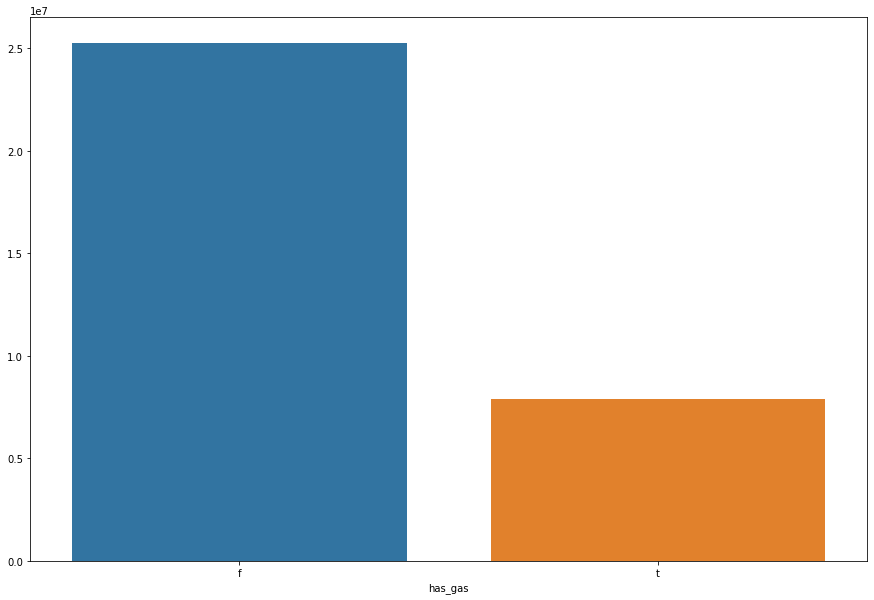

In [26]:
plt.figure(figsize=(15,10))
prod_day=df_merge[['net_margin','has_gas']].groupby('has_gas')['net_margin'].sum()
sns.barplot(x=prod_day.index,y=prod_day.values)



In [30]:
px.pie(names=prod_day.index,values=prod_day.values,title='net margin by electricity ')
# ie. 76.1 % net profit besides electricity

#  finding  customer  churn ratio

In [34]:
px.pie(names='churn',data_frame=df_merge)
# 9.71% customer will churn in next 3 months

# finding   net margin loss  due to churn 

In [37]:
churn_net=df_merge[['net_margin','churn']].groupby('churn')['net_margin'].sum()
px.pie(names=churn_net.index,values=churn_net.values)
# 11.7 % net margin will be in loss in next three months

#   paid consumer churn ratio

In [43]:
# out of them how many  current paid consumption which will churn
paid_churn=df_merge[['imp_cons','churn']].groupby('churn')['imp_cons'].sum()
px.pie(names=paid_churn.index,values=paid_churn.values)
# 9.61% paid consumer will  churn out

# Gross margin power subscription  loss due to churn

In [46]:
# finding  gross margin loss in power subscription
gross_power_churn=df_merge[['margin_gross_pow_ele','churn']].groupby('churn')['margin_gross_pow_ele'].sum()
px.pie(names=gross_power_churn.index,values=gross_power_churn.values)
# 12 % gross margin on power subscription will be loss

# finding why will they churn 

# finding data distribution  in forecast and  consumption

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\KIIT\anaconda3\lib\site-package

<AxesSubplot:xlabel='forecast_meter_rent_12m', ylabel='Density'>

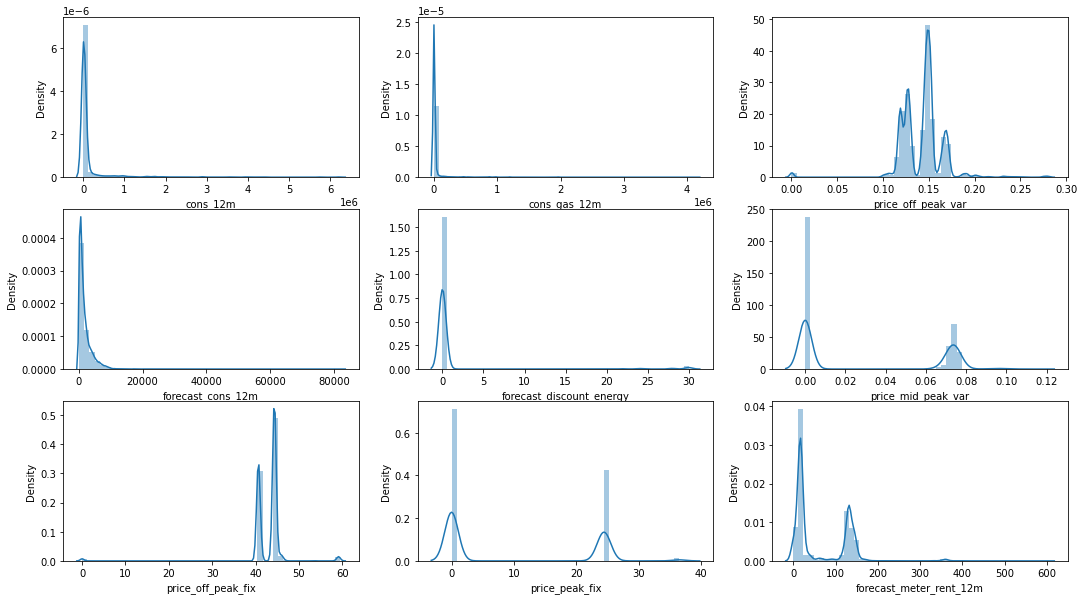

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
sns.distplot(ax=axes[0, 0],  a=df_merge['cons_12m'])
sns.distplot(ax=axes[0, 1],  a=df_merge['cons_gas_12m'])
sns.distplot(ax=axes[0, 2],  a=df_merge['price_off_peak_var'])
sns.distplot(ax=axes[1, 0],  a=df_merge['forecast_cons_12m'])
sns.distplot(ax=axes[1, 1],  a=df_merge['forecast_discount_energy'])
sns.distplot(ax=axes[1, 2],  a=df_merge['price_mid_peak_var'])
sns.distplot(ax=axes[2, 0],  a=df_merge['price_off_peak_fix'])
sns.distplot(ax=axes[2, 1],  a=df_merge['price_peak_fix'])
sns.distplot(ax=axes[2, 2],  a=df_merge['forecast_meter_rent_12m'])











In [ ]:
●forecast_cons_12m = forecasted electricity consumption for next 12 months
●forecast_cons_year = forecasted electricity consumption for the next calendar year
●forecast_discount_energy = forecasted value of current discount
●forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
●forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
●forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
●forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)


In [62]:
df_merge['forecast_cons_12m'].value_counts()





0.00       3672
0.15         72
415.14       48
0.30         36
1210.67      36
           ... 
206.48        9
12.65         8
3706.93       7
7220.29       7
1353.65       7
Name: forecast_cons_12m, Length: 13993, dtype: int64

In [64]:
df_merge['cons_12m'].value_counts()


0          1404
2882597     324
3329244     288
3926060     216
6207104     216
           ... 
13451        10
103418       10
3381          9
1408          9
50449         7
Name: cons_12m, Length: 11065, dtype: int64

In [69]:
df_merge.forecast_discount_energy.value_counts()

0.0     169009
30.0      3120
28.0      1222
24.0       996
22.0       564
25.0        84
26.0        60
19.0        24
17.0        24
23.0        24
10.0        12
5.0         10
Name: forecast_discount_energy, dtype: int64

# finding reason of churn

#  forecasting discount  in weekdays

In [75]:
data_discount_week=df_merge[['forecast_discount_energy','day']].groupby('day')['forecast_discount_energy'].sum()
px.pie(names=data_discount_week.index,values=data_discount_week.values)




In [133]:
# forecasting discount in month
data_discount_month=df_merge[['forecast_discount_energy','month']].groupby('month')['forecast_discount_energy'].sum()
px.pie(names=data_discount_month.index,values=data_discount_month.values,title='Forecasting discount enery in month')


# data distribution in  price variance 

<AxesSubplot:xlabel='price_mid_peak_var'>

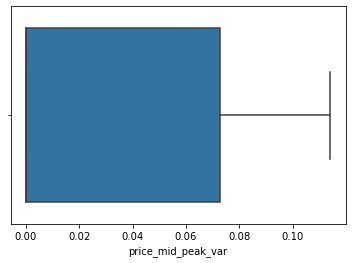

In [78]:
# ●price of energy for the 3rd period (mid peak)
sns.boxplot(x=df_merge.price_mid_peak_var)


<AxesSubplot:xlabel='price_peak_var'>

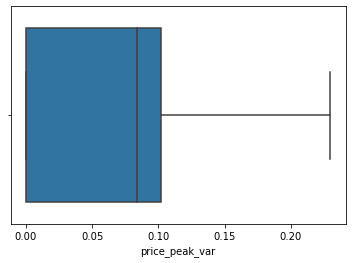

In [79]:
# price of energy for the 2nd period (peak)
sns.boxplot(x=df_merge.price_peak_var)


<AxesSubplot:xlabel='price_off_peak_var'>

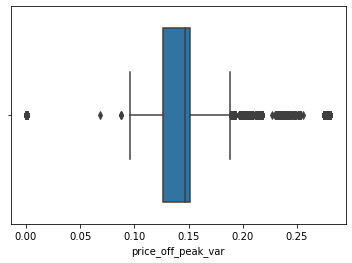

In [80]:
# price_off_peak_var = price of energy for the 1st period (off peak)
sns.boxplot(x=df_merge.price_off_peak_var)

In [ ]:
●price_off_peak_fix = price of power for the 1st period (off peak)
●price_peak_fix = price of power for the 2nd period (peak)
price_mid_peak_fix = price of power for the 3rd period (mid peak)

<AxesSubplot:xlabel='price_off_peak_fix'>

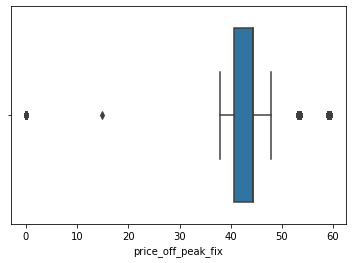

In [82]:
sns.boxplot(x=df_merge['price_off_peak_fix'])

<AxesSubplot:xlabel='price_peak_fix'>

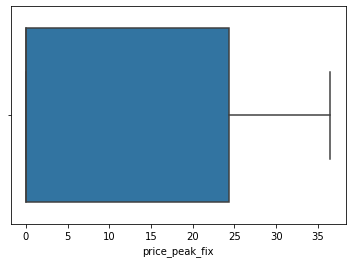

In [83]:
sns.boxplot(x=df_merge['price_peak_fix'])


<AxesSubplot:xlabel='price_mid_peak_fix'>

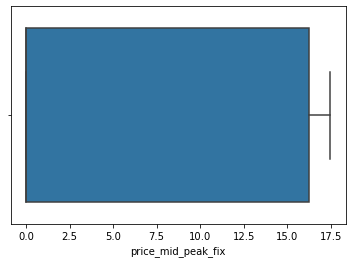

In [84]:
sns.boxplot(x=df_merge['price_mid_peak_fix'])



# finding  whether  price variance has churned customer or  not

In [118]:
price_off_peak=df_merge[['price_off_peak_var','churn']].groupby('price_off_peak_var')['churn'].sum().sort_values(ascending=False).head(n=40)
px.pie(names=price_off_peak.index,values=price_off_peak.values)
# out of 40 ,customer 6.65 % will churn due to 0.145 variance

# churn due to price_peak_var

In [115]:
variance_churn=df_merge[['price_peak_var','churn']].groupby('price_peak_var')['churn'].sum().sort_values(ascending=False).head(n=40)
px.pie(names=variance_churn.index,values=variance_churn.values)
# 56.91 %  customer will be churned  due price peak vaiance  due to zero variance in first 40 customer

# churn due price mid peak var

In [116]:
# price_mid_peak_var
variance_mid_churn=df_merge[['price_mid_peak_var','churn']].groupby('price_mid_peak_var')['churn'].sum().sort_values(ascending=False).head(n=40)
px.pie(names=variance_mid_churn.index,values=variance_mid_churn.values)
#   63.3% customer will be churned  due price peak vaiance being 0    in first 40 customer

# It seems that  price off peak variance has resulted  more customer churn than peak and mid peak variance


# discount energy role in customer  churn


In [131]:
discount_churn=df_merge[['forecast_discount_energy','churn']].groupby('forecast_discount_energy')['churn'].sum()
px.pie(names=discount_churn.index,values=discount_churn.values)
#it seems that  due to 0 discount  95.5  %customer will be churn out

0         1
1         1
2         1
3         1
4         1
         ..
175144    0
175145    0
175146    0
175147    0
175148    0
Name: churn, Length: 175149, dtype: int64